In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics, tree
from sklearn.naive_bayes import  BernoulliNB, GaussianNB, MultinomialNB
from sklearn import preprocessing 
import seaborn as sns
import io
#from google.colab import files
#!pip install PyDrive
import os
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#from google.colab import drive
import math


In [2]:
#drive.mount('/gdrive')

In [3]:
#data = pd.read_csv("/gdrive/My Drive/archivos_analitica/training.tsv",sep="\t")
data = pd.read_csv("training.tsv", sep="\t")
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Conversion,ID
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,2
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1,3
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,4
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1,5


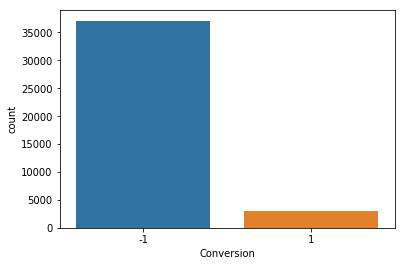

In [4]:
ax=sns.countplot(x="Conversion",data=data)

In [5]:

data.shape[0]

40053

In [6]:
data.Conversion[data.Conversion==-1].aggregate('count')/data.shape[0]*100

92.63975232816519

Se tiene que el baseline es un modelo que que clasifica a los datos en "-1", con una exactitud de 92.64%

**Entendimiento de los datos, limpieza**

Se analizará los datos y qué inconsistencias presentan.

In [7]:
print('Existen ', data.shape, ' número de datos y columnas respectivamente.')

Existen  (40053, 232)  número de datos y columnas respectivamente.


In [8]:
data.tail()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Conversion,ID
40048,NaN,NaN,NaN,NaN,NaN,2226.0,7.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,40049
40049,NaN,NaN,NaN,NaN,NaN,266.0,0.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,40050
40050,NaN,NaN,NaN,NaN,NaN,1078.0,0.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN,-1,40051
40051,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,40052
40052,NaN,NaN,NaN,NaN,NaN,1694.0,7.0,NaN,NaN,NaN,...,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1,40053


In [9]:

data.describe(include="all")

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Conversion,ID
count,549.000000,987.000000,986.000000,1242.000000,1.206000e+03,35641.000000,35649.000000,0.0,549.000000,1.206000e+03,...,35885,651,19121,40053,40053,40053,17314,0.0,40053.000000,40053.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,3,23,7,29,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LM8l689qOp,4n2X,ELof,FSa2,RAYp,F2FyR07IdsN7I,am7c,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29314,651,8885,6387,28177,26189,9369,NaN,NaN,NaN
mean,12.167577,0.005066,473.181542,0.152174,2.352029e+05,1322.620157,6.803052,NaN,50.539162,4.002348e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.852795,20027.000000
std,45.250975,0.159152,4738.645209,1.414282,6.339295e+05,2620.594097,6.337622,NaN,171.858329,9.572521e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522252,11562.449503
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,10014.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,20027.000000
75%,16.000000,0.000000,0.000000,0.000000,1.111938e+05,1428.000000,7.000000,NaN,46.000000,2.625885e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,30040.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40053 entries, 0 to 40052
Columns: 232 entries, Var1 to ID
dtypes: float64(191), int64(3), object(38)
memory usage: 70.9+ MB


In [11]:

data.dtypes

Var1          float64
Var2          float64
Var3          float64
Var4          float64
Var5          float64
Var6          float64
Var7          float64
Var8          float64
Var9          float64
Var10         float64
Var11         float64
Var12         float64
Var13         float64
Var14         float64
Var15         float64
Var16         float64
Var17         float64
Var18         float64
Var19         float64
Var20         float64
Var21         float64
Var22         float64
Var23         float64
Var24         float64
Var25         float64
Var26         float64
Var27         float64
Var28         float64
Var29         float64
Var30         float64
               ...   
Var203         object
Var204         object
Var205         object
Var206         object
Var207         object
Var208         object
Var209        float64
Var210         object
Var211         object
Var212         object
Var213         object
Var214         object
Var215         object
Var216         object
Var217    

La variable objetivo llamada "Conversion" es tipo numerica y debería ser tipo String, ya que es una variable binaria categorica. 


In [12]:
data.Conversion=data.Conversion.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40053 entries, 0 to 40052
Columns: 232 entries, Var1 to ID
dtypes: float64(191), int64(2), object(39)
memory usage: 70.9+ MB


Podemos ver que la cantidad de columnas es de 232 y la cantidad de filas es de 40.053.

In [13]:
data.shape

(40053, 232)

Se va  definir que las columnas que contengan menos del 80% de sus valores van a ser eliminadas. Es decir que la cantidad de datos no nulos en la columna sea superior a 32.042

In [14]:
list_null_colums = data.isnull().sum()
list_null_colums

Var1          39504
Var2          39066
Var3          39067
Var4          38811
Var5          38847
Var6           4412
Var7           4404
Var8          40053
Var9          39504
Var10         38847
Var11         39067
Var12         39610
Var13          4404
Var14         39067
Var15         40053
Var16         38847
Var17         38811
Var18         38811
Var19         38811
Var20         40053
Var21          4412
Var22          3984
Var23         38847
Var24          5774
Var25          3984
Var26         38847
Var27         38847
Var28          3986
Var29         39504
Var30         39504
              ...  
Var203          120
Var204            0
Var205         1558
Var206         4412
Var207            0
Var208          120
Var209        40053
Var210            0
Var211            0
Var212            0
Var213        39144
Var214        20340
Var215        39511
Var216            0
Var217          558
Var218          558
Var219         4168
Var220            0
Var221            0


Ahora se va a proceder a borrar las columnas que no superen el umbral.

In [15]:
for x in range(len(data.columns)):
  if list_null_colums[x] >= 20000:
    data = data.drop([list_null_colums.keys()[x]],axis=1)
  
  

Vamos a ver con cuantas columnas nos quedamos

In [16]:
data.shape

(40053, 71)

Tenemos 68 columnas que tienen 80% de sus datos no nulos

In [17]:
data.head(20)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,Conversion,ID
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I,-1,1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,-1,2
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6,-1,3
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1,4
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1,5
5,658.0,7.0,3156.0,224.0,280.0,2.0,72.0,200.00,5.0,0.0,...,FzaX,KbkKEj0,zCkv,QqVuch3,LM8l689qOp,Qcbd,02N6s8f,Zy3gnGM,-1,6
6,77.0,0.0,0.0,32.0,40.0,2.0,16.0,230.56,0.0,3776496.0,...,NaN,U8IKsQe,oslk,R2LdzOv,NaN,FSa2,RAYp,F2FyR07IdsN7I,-1,7
7,1176.0,7.0,2912.0,200.0,250.0,2.0,64.0,300.32,0.0,6014460.0,...,FzaX,ROeipLp,zCkv,K2SqEo9,jySVZNlOJy,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,-1,8
8,1141.0,7.0,164.0,208.0,260.0,2.0,72.0,166.56,5.0,5317974.0,...,FzaX,fabLnWA,oslk,EPqQcw6,LM8l689qOp,FSa2,RAYp,55YFVY9,-1,9
9,490.0,7.0,2060.0,92.0,115.0,6.0,112.0,133.12,0.0,3534.0,...,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,WqMG,ZI9m,ib5G6X1eUxUn6,-1,10


In [18]:
data.count()

Var6          35641
Var7          35649
Var13         35649
Var21         35641
Var22         36069
Var24         34279
Var25         36069
Var28         36067
Var35         36069
Var38         36069
Var44         36069
Var57         40053
Var65         35649
Var72         22068
Var73         40053
Var74         35649
Var76         36069
Var78         36069
Var81         35641
Var83         36069
Var85         36069
Var94         22068
Var109        34279
Var112        36069
Var113        40053
Var119        35641
Var123        36069
Var125        35649
Var126        28873
Var132        36069
              ...  
Var192        39765
Var193        40053
Var195        40053
Var196        40053
Var197        39933
Var198        40053
Var199        40050
Var202        40053
Var203        39933
Var204        40053
Var205        38495
Var206        35641
Var207        40053
Var208        39933
Var210        40053
Var211        40053
Var212        40053
Var216        40053
Var217        39495


Como se puede observar muchas de las variables no tienen la misma cantidad de datos, por lo tanto se analizará por filas, cuales son las que tienen la mitad o más de su información tipo null o vacía.


In [19]:
data.shape

(40053, 71)

In [20]:
data_aux = data.dropna()

In [21]:
data_aux.shape

(14253, 71)

In [22]:
list_null_rows=data.isnull().sum(axis=1) 
list_null_rows

0         2
1         3
2         2
3        11
4         0
5         3
6         4
7         3
8         1
9         2
10        0
11        5
12        3
13        0
14        3
15        3
16        2
17        0
18        4
19        2
20        1
21        2
22        1
23        1
24        1
25        0
26        0
27       11
28        4
29        0
         ..
40023     2
40024     3
40025    38
40026     2
40027     2
40028     1
40029     0
40030    40
40031     0
40032     0
40033     0
40034     2
40035     1
40036     8
40037     0
40038     1
40039     0
40040     8
40041     2
40042     6
40043    10
40044     2
40045     2
40046     0
40047     0
40048     0
40049     0
40050     0
40051    38
40052     0
Length: 40053, dtype: int64

In [23]:
for x in range(len(data.ID)):
  if list_null_rows[x] >= 34:
    print(list_null_rows[x])

38
41
40
38
40
38
39
39
40
41
39
38
38
38
40
38
38
38
38
38
38
38
38
38
40
40
38
41
39
40
39
39
38
40
40
38
40
38
38
38
40
40
41
40
40
38
38
38
38
40
40
38
38
41
39
40
42
38
38
38
38
40
40
38
40
40
38
38
38
40
40
40
38
38
40
38
39
40
41
41
38
39
38
40
38
38
39
38
38
38
40
38
40
40
38
40
38
38
38
38
41
38
38
38
38
40
38
39
39
38
38
38
38
38
38
38
38
38
39
40
40
38
38
38
38
38
38
38
40
39
38
38
38
40
38
39
40
38
38
40
41
39
38
39
38
40
38
40
38
38
38
38
40
40
40
38
38
38
40
41
41
38
38
38
39
38
38
38
38
38
38
38
38
40
38
39
38
38
38
38
38
38
40
40
41
40
38
38
38
38
38
40
41
38
38
40
38
40
38
40
41
38
39
38
40
40
38
40
38
38
38
38
39
38
38
38
38
38
40
39
38
40
40
38
38
38
38
42
38
39
40
38
40
39
38
39
38
41
41
38
38
38
38
38
41
38
38
38
38
38
39
40
38
38
38
41
38
38
40
38
38
38
38
38
39
38
38
38
38
40
38
38
41
38
38
38
38
38
38
40
40
38
38
41
38
38
38
40
39
38
40
38
40
38
39
41
38
41
38
40
41
41
38
38
38
38
38
38
40
38
38
38
38
38
38
38
38
40
38
40
38
40
40
40
38
38
38
38
38
40
39
40
40
3

38
38
38
39
39
40
40
38
39
38
39
38
38
38
39
38
38
38
38
39
38
38
39
40
40
39
38
40
38
38
40
38
38
38
40
38
39
40
40
41
40
40
38
38
39
39
38
40
38
38
40
39
38
40
40
40
38
38
38
38
40
38
38
38
38
38
38
38
38
40
38
40
38
40
38
38
39
41
38
40
38
38
38
38
39
38
38
38
41
41
38
38
40
38
38
40
40
38
39
41
38
38
38
40
38
38
38
38
38
38
38
38
41
38
38
39
40
41
38
38
40
38
38
42
40
38
39
40
38
38
40
38
38
39
38
40
38
38
39
40
38
40
40
38
39
38
40
38
38
39
38
38
38
40
39
38
40
38
38
38
39
38
38
40
39
38
38
41
39
39
39
40
38
40
40
40
40
38
41
39
38
40
38
40
38
38
38
41
38
40
39
38
40
38
38
39
40
39
38
40
38
39
39
38
38
38
38
39
38
39
38
40
40
38
38
38
38
38
39
39
40
38
40
40
39
38
39
38
38
38
38
40
41
38
39
40
39
38
38
38
38
41
39
38
40
38
38
38
38
38
38
38
39
38
39
38
38
40
38
38
38
38
38
40
38
38
38
39
38
38
38
38
38
40
39
39
40
38
38
39
38
40
38
38
38
38
38
38
38
38
38
41
41
40
40
38
38
41
41
39
38
38
38
41
38
38
38
38
38
38
38
38
41
40
38
40
40
38
39
38
38
38
41
38
40
38
38
38
38
38
38
38
38
3

In [24]:
for x in range(len(data.ID)):
  if list_null_rows[x] >= 34:
    data = data.drop([list_null_rows.keys()[x]],axis=0)

In [25]:
data.shape

(36069, 71)

In [26]:
data.count()

Var6          35641
Var7          35649
Var13         35649
Var21         35641
Var22         36069
Var24         34279
Var25         36069
Var28         36067
Var35         36069
Var38         36069
Var44         36069
Var57         36069
Var65         35649
Var72         22068
Var73         36069
Var74         35649
Var76         36069
Var78         36069
Var81         35641
Var83         36069
Var85         36069
Var94         22068
Var109        34279
Var112        36069
Var113        36069
Var119        35641
Var123        36069
Var125        35649
Var126        25441
Var132        36069
              ...  
Var192        35825
Var193        36069
Var195        36069
Var196        36069
Var197        35955
Var198        36069
Var199        36066
Var202        36069
Var203        35955
Var204        36069
Var205        34697
Var206        35641
Var207        36069
Var208        35955
Var210        36069
Var211        36069
Var212        36069
Var216        36069
Var217        35556


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36069 entries, 0 to 40052
Data columns (total 71 columns):
Var6          35641 non-null float64
Var7          35649 non-null float64
Var13         35649 non-null float64
Var21         35641 non-null float64
Var22         36069 non-null float64
Var24         34279 non-null float64
Var25         36069 non-null float64
Var28         36067 non-null float64
Var35         36069 non-null float64
Var38         36069 non-null float64
Var44         36069 non-null float64
Var57         36069 non-null float64
Var65         35649 non-null float64
Var72         22068 non-null float64
Var73         36069 non-null int64
Var74         35649 non-null float64
Var76         36069 non-null float64
Var78         36069 non-null float64
Var81         35641 non-null float64
Var83         36069 non-null float64
Var85         36069 non-null float64
Var94         22068 non-null float64
Var109        34279 non-null float64
Var112        36069 non-null float64
Var11

In [28]:
data.describe(include="all")

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,Conversion,ID
count,35641.000000,35649.000000,35649.000000,35641.000000,36069.000000,34279.000000,36069.000000,36067.000000,36069.000000,3.606900e+04,...,32972,36069,36069,36069,32972,36069,36069,36069,36069,36069.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,3619,7,3619,4,23,7,29,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FzaX,4UxGlow,oslk,catzS2D,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29612,3574,26352,3574,26401,5825,24980,22480,33259,NaN
mean,1322.620157,6.803052,1243.547477,235.027188,290.822174,4.499781,96.971250,224.476595,0.726247,2.579645e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20019.36993
std,2620.594097,6.337622,2789.894728,569.993340,710.141392,9.846298,218.407522,99.457181,3.039886,3.008783e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11555.98475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
25%,518.000000,0.000000,0.000000,112.000000,135.000000,0.000000,16.000000,166.560000,0.000000,8.034000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016.00000
50%,861.000000,7.000000,228.000000,144.000000,180.000000,2.000000,48.000000,220.080000,0.000000,1.299918e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.00000
75%,1428.000000,7.000000,1600.000000,228.000000,285.000000,6.000000,112.000000,266.400000,0.000000,4.565718e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30035.00000


Como algunas variables  presentan un porcentaje pequeño de datos vacíos (aprox. entre el 1% al 14% de sus datos son nulos) el cual no afectará a la variable objetivo, se considera que la mejor solución es la siguiente:
1. Para las variables numéricas reemplazar dichos datos nulos por el promedio de los valores presentes en la respectiva variable.

2. Para las variables categoricas o tipo object reemplazar los datos nulos por el dato que más porcentaje de aparición tiene.

In [29]:
#var=data[data.columns[0]].dtype
#palabra_comun=data[data.columns[64]].value_counts()
#data1=data
# df1['weight'] = surveys_df['weight'].fillna(surveys_df['weight'].mean())


#data1=data
#promedio=data1["Var193"].value_counts().idxmax()
#data1["Var193"]=data1["Var193"].fillna(promedio)
#otro=data1["Var193"].isnull().sum()
#data1.head(5)
#prom=promedio
#print(len(data["Var223"]),"valores nulos",otro,"este es promedio",prom)

In [30]:
data=data.drop_duplicates(keep="first")
data[data.duplicated()]



,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,Conversion,ID


In [31]:
data.shape

(36069, 71)

In [32]:



for x in range(len(data.columns)):
  var=data[data.columns[x]].dtype
 
  if(var=="float64" or var=="int64"):
   
    promedio=data[data.columns[x]].mean()
    data[data.columns[x]]=data[data.columns[x]].fillna(promedio)
   # print("1")
 
  elif(var=="object"):
    
    palabra_comun=data[data.columns[x]].value_counts().idxmax()
    data[data.columns[x]]=data[data.columns[x]].fillna(palabra_comun)
    #print("2")
data.count()  

    
  
  

Var6          36069
Var7          36069
Var13         36069
Var21         36069
Var22         36069
Var24         36069
Var25         36069
Var28         36069
Var35         36069
Var38         36069
Var44         36069
Var57         36069
Var65         36069
Var72         36069
Var73         36069
Var74         36069
Var76         36069
Var78         36069
Var81         36069
Var83         36069
Var85         36069
Var94         36069
Var109        36069
Var112        36069
Var113        36069
Var119        36069
Var123        36069
Var125        36069
Var126        36069
Var132        36069
              ...  
Var192        36069
Var193        36069
Var195        36069
Var196        36069
Var197        36069
Var198        36069
Var199        36069
Var202        36069
Var203        36069
Var204        36069
Var205        36069
Var206        36069
Var207        36069
Var208        36069
Var210        36069
Var211        36069
Var212        36069
Var216        36069
Var217        36069


Todas las variables sin espacios o campos vacíos.

Se borra la columna id debido a que no es necesaria para lo que sigue del proyecto

In [33]:
data = data.drop(["ID"], axis=1)

**Visualización de los datos**

Para esto es necesario separar variables categoricas de las numericas.

In [34]:
len(data.values[0])

70

In [35]:
var_indep_cat = []
var_indep_num = []

for x in range(len(data.columns)):
  var=data[data.columns[x]].dtype
  if var=="float64" or var=="int64":
    var_indep_num.append(data.columns[x])
  elif var == "object":
    var_indep_cat.append(data.columns[x])
    
var_indep_cat.remove('Conversion')

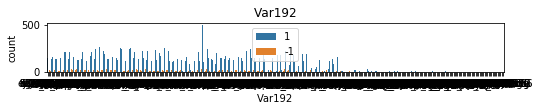

In [36]:
var_aux = var_indep_cat[0:1]
fig = plt.figure(figsize=(18,15))
i=1
for var_cat in var_aux:
    ax = fig.add_subplot(math.ceil(len(var_indep_cat)/2), 2, i)
    sns.countplot(x=var_cat, hue="Conversion", data=data)
    plt.title(var_cat)
    plt.legend(['1', '-1'])
    i+=1
    

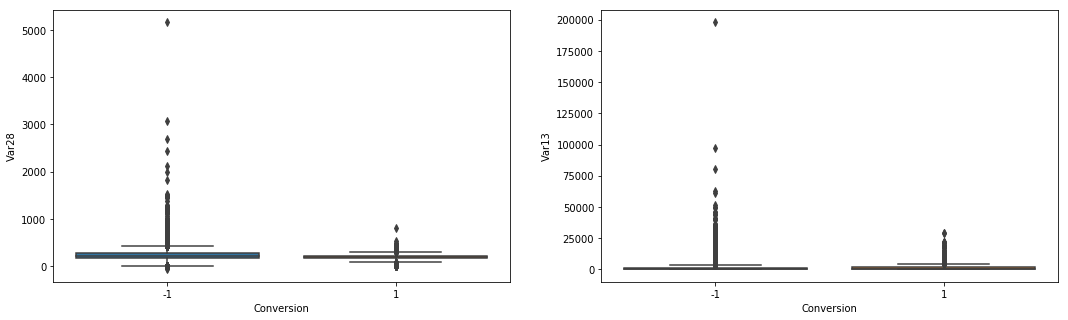

In [37]:
var_indep_num_aux = ['Var28', 'Var113', 'Var13', 'Var134', 'Var119', 'Var38', 'Var25']

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
#otra variable a tener presente var7,var38 var73, var76, var81, var132, var134, var153
#Falta mirar con variables object
sns.boxplot(x="Conversion", y=data.Var28, data=data)
plt.subplot(1,2,2)
sns.boxplot(x="Conversion", y=data.Var13, data=data)

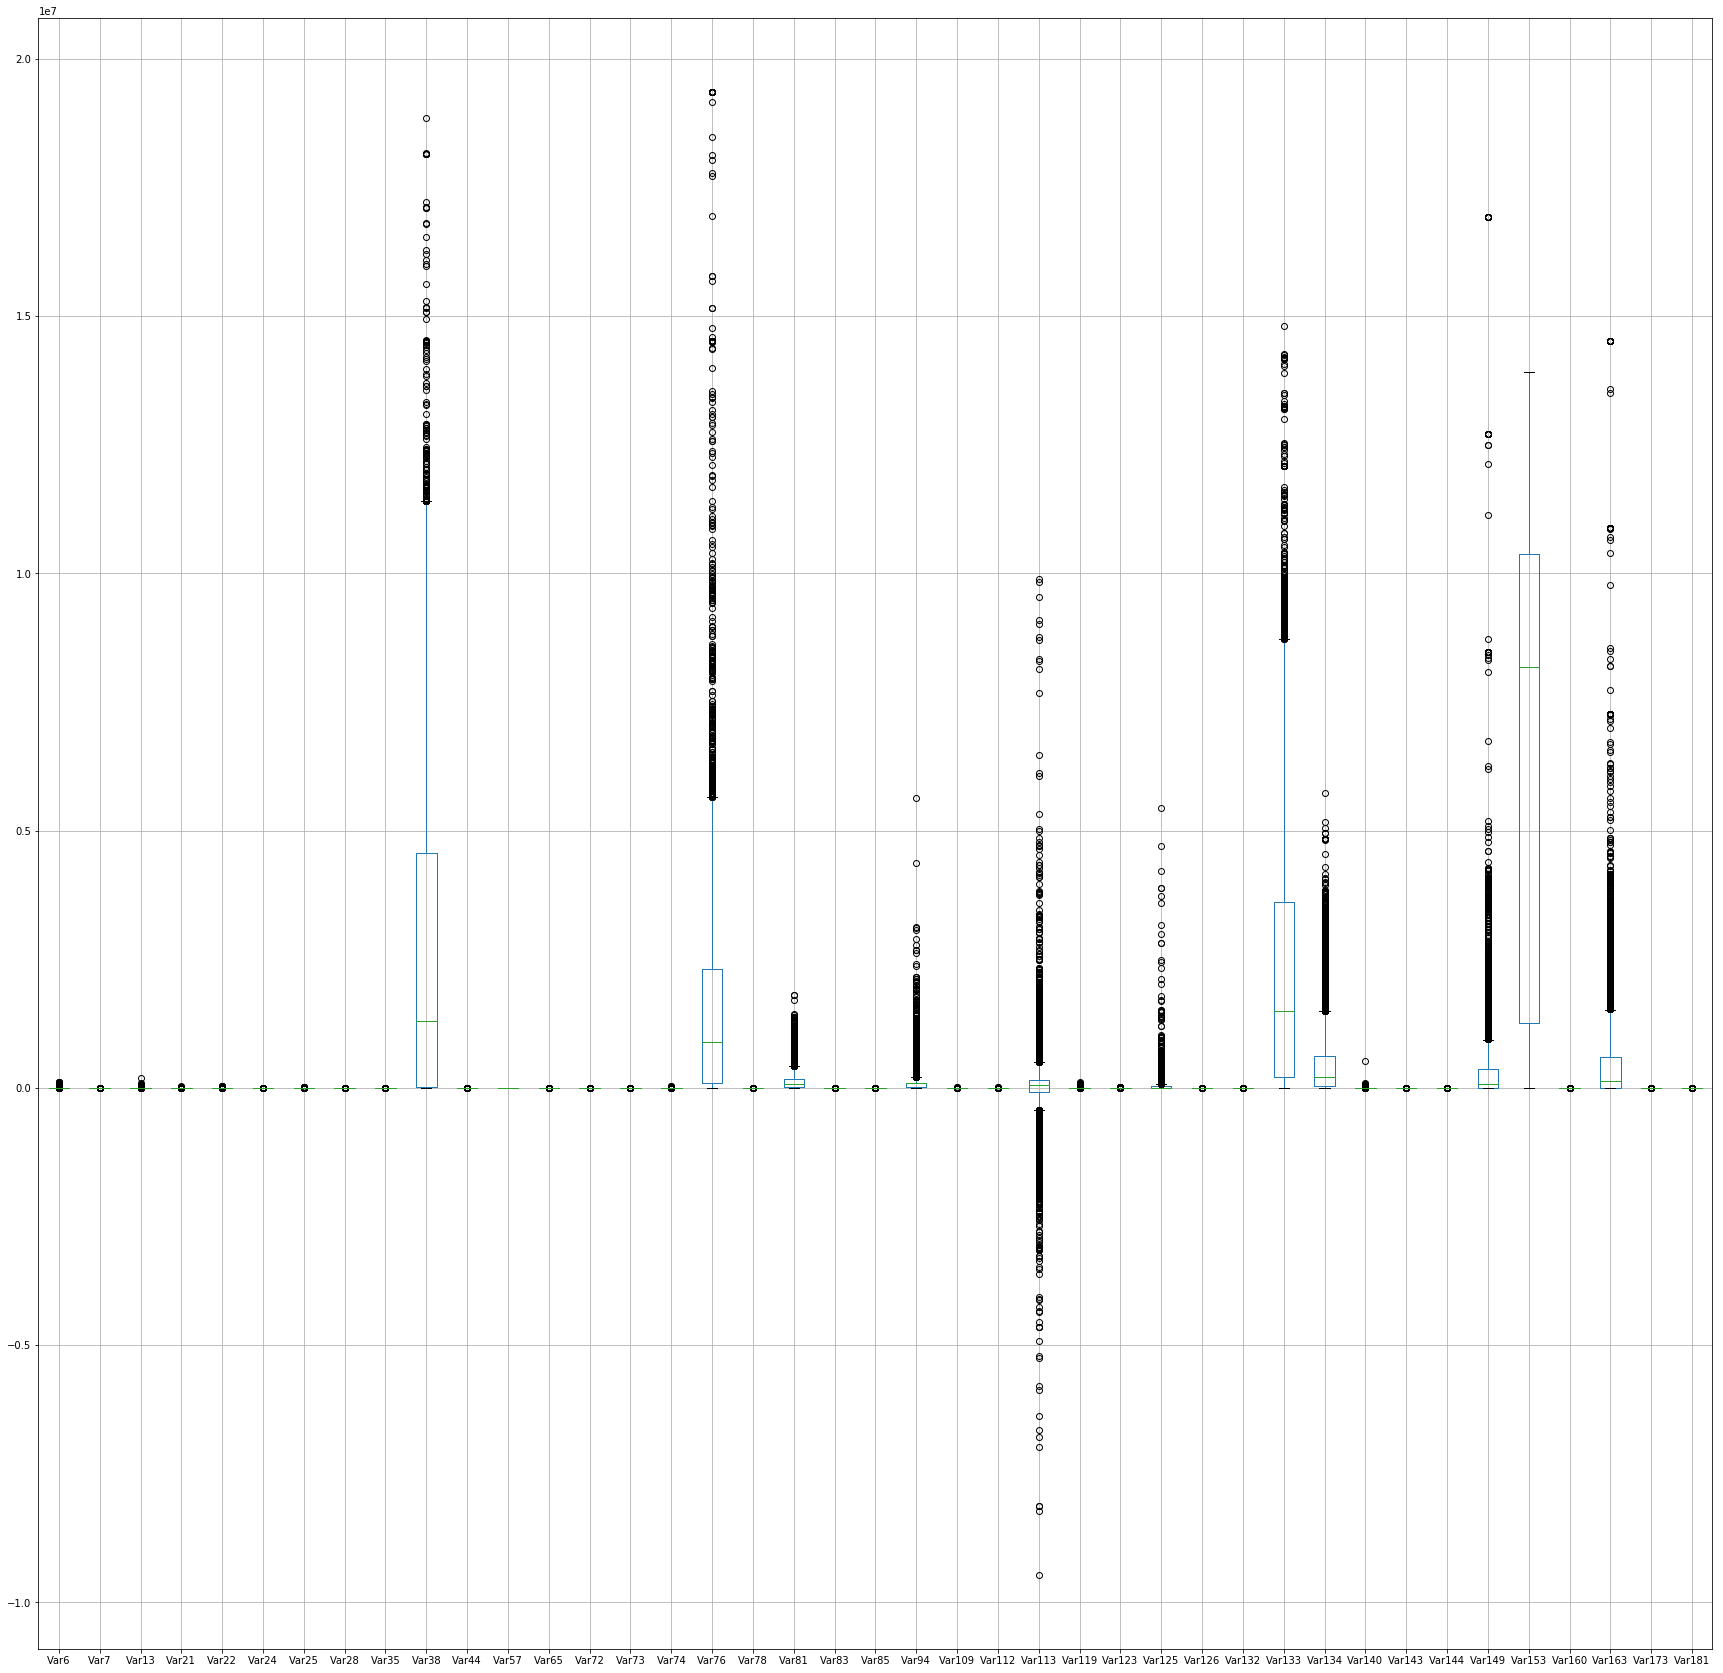

In [38]:
plt.figure(figsize=(30,30))
data.boxplot()

vamos a sacar las variables más grandes

In [39]:
var_big = ["Var38","Var76","Var81","Var113","Var125","Var133","Var134","Var149","Var153","Var163"]

data_aux = data.drop(var_big, axis=1)



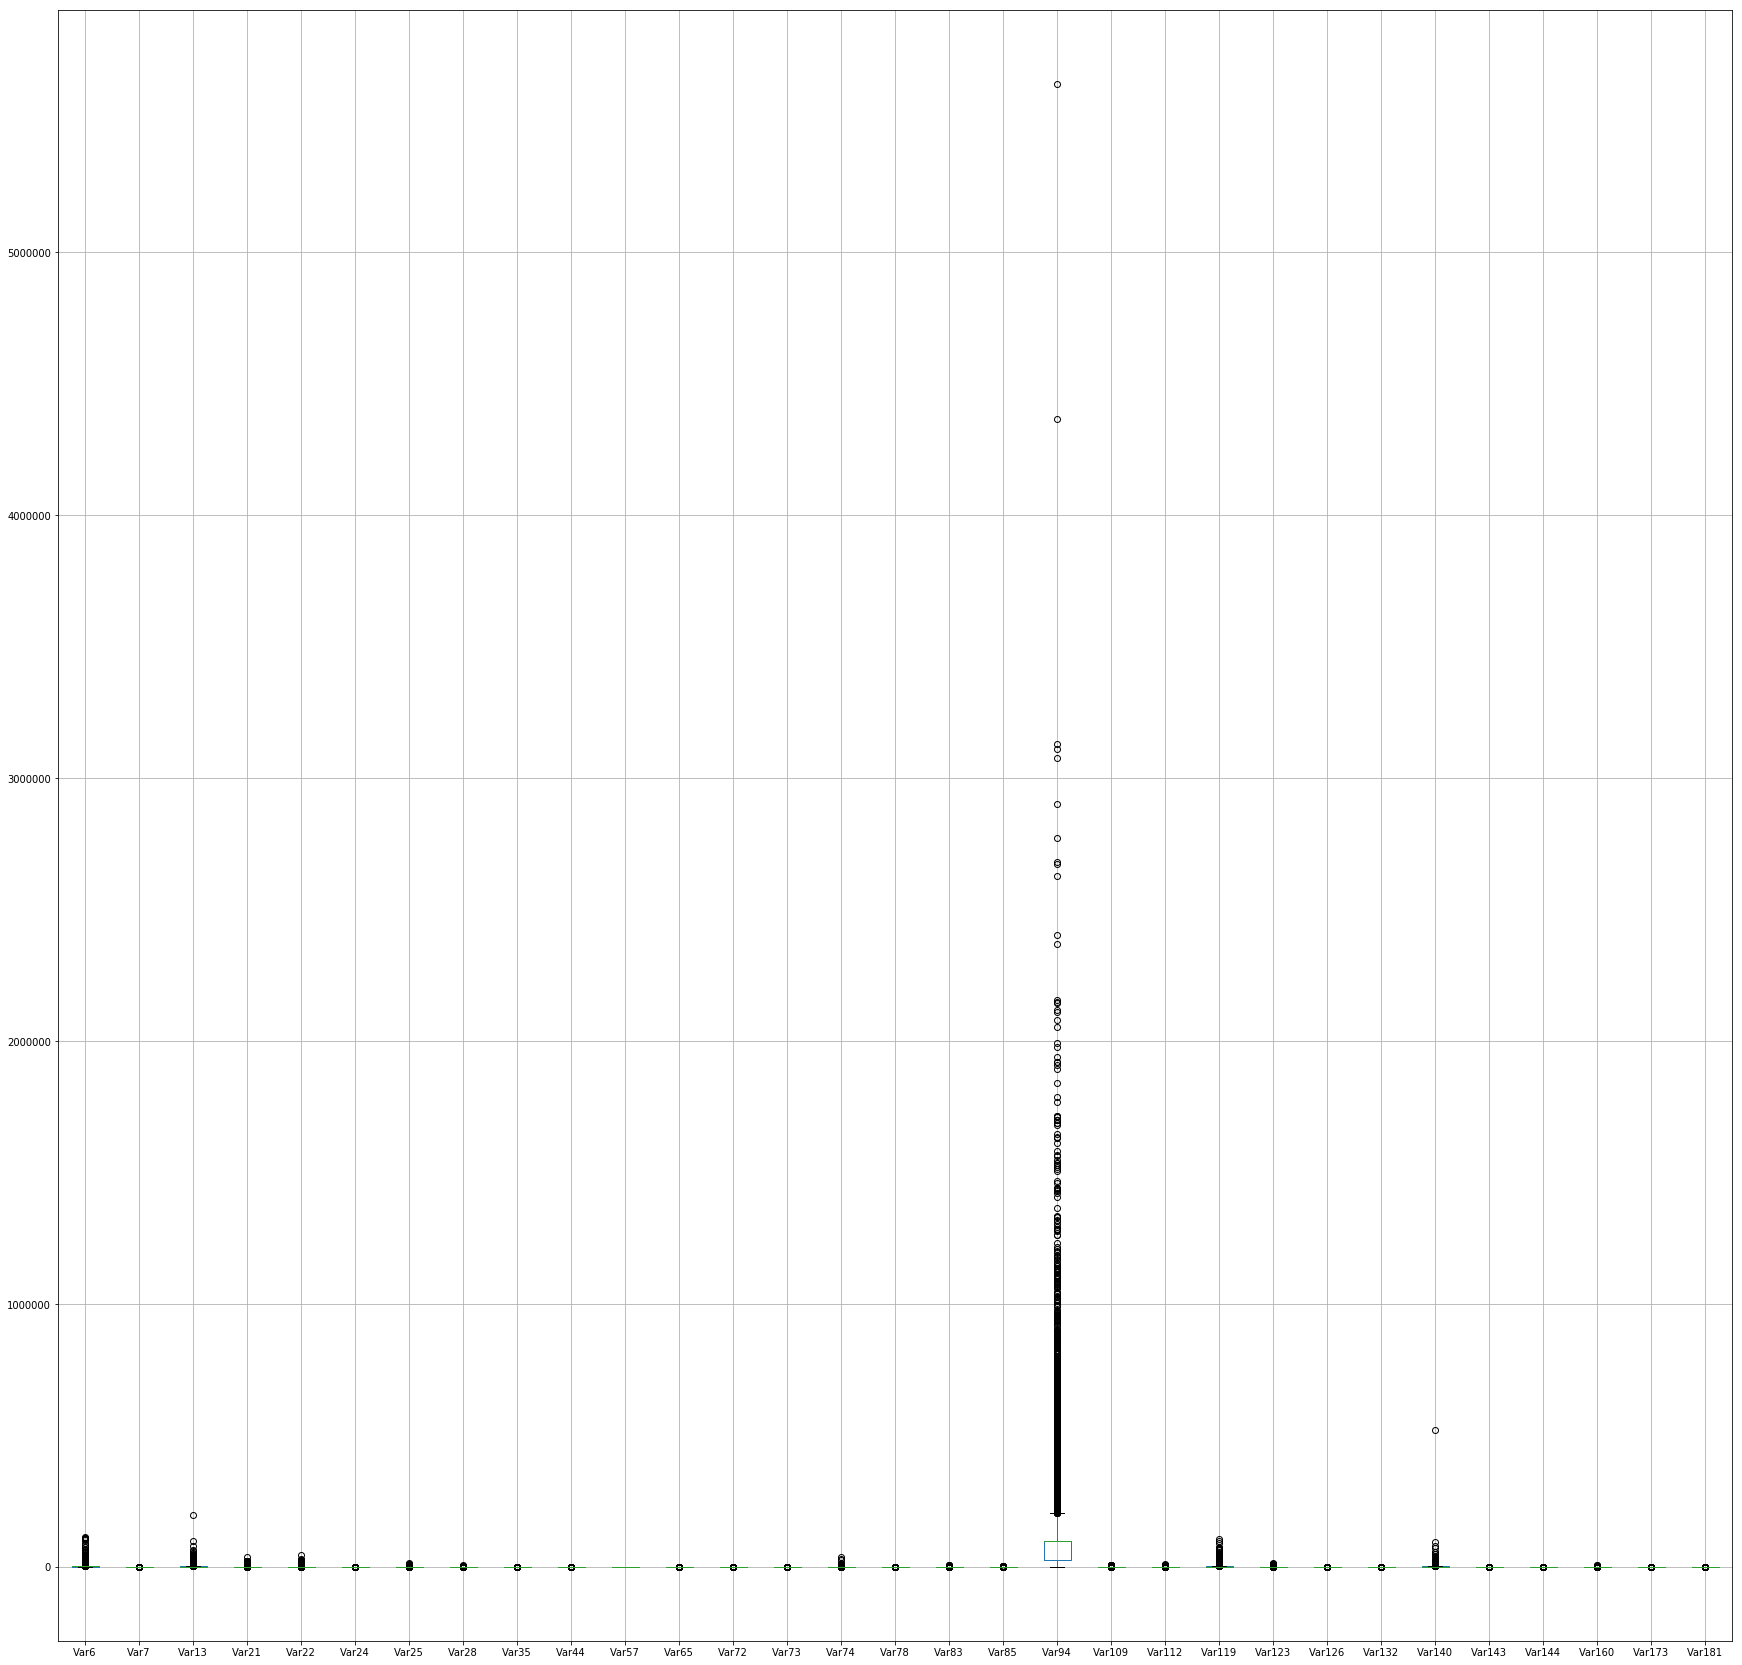

In [40]:
plt.figure(figsize=(30,30))
data_aux.boxplot()

Toca borrar los datos atipicos

In [41]:
indicesAQuitar = []
for x in var_indep_num:
    temp = data.sort_values([x], ascending=False)
    indicesAQuitar = np.union1d(indicesAQuitar, temp[0:200].index.get_values())


In [42]:
indicesAQuitar

array([6.0000e+00, 8.0000e+00, 1.8000e+01, ..., 4.0040e+04, 4.0041e+04,
       4.0047e+04])

In [43]:
dataDepurado = data.loc[~data.index.isin(indicesAQuitar)]
dataDepurado.shape

(30896, 70)

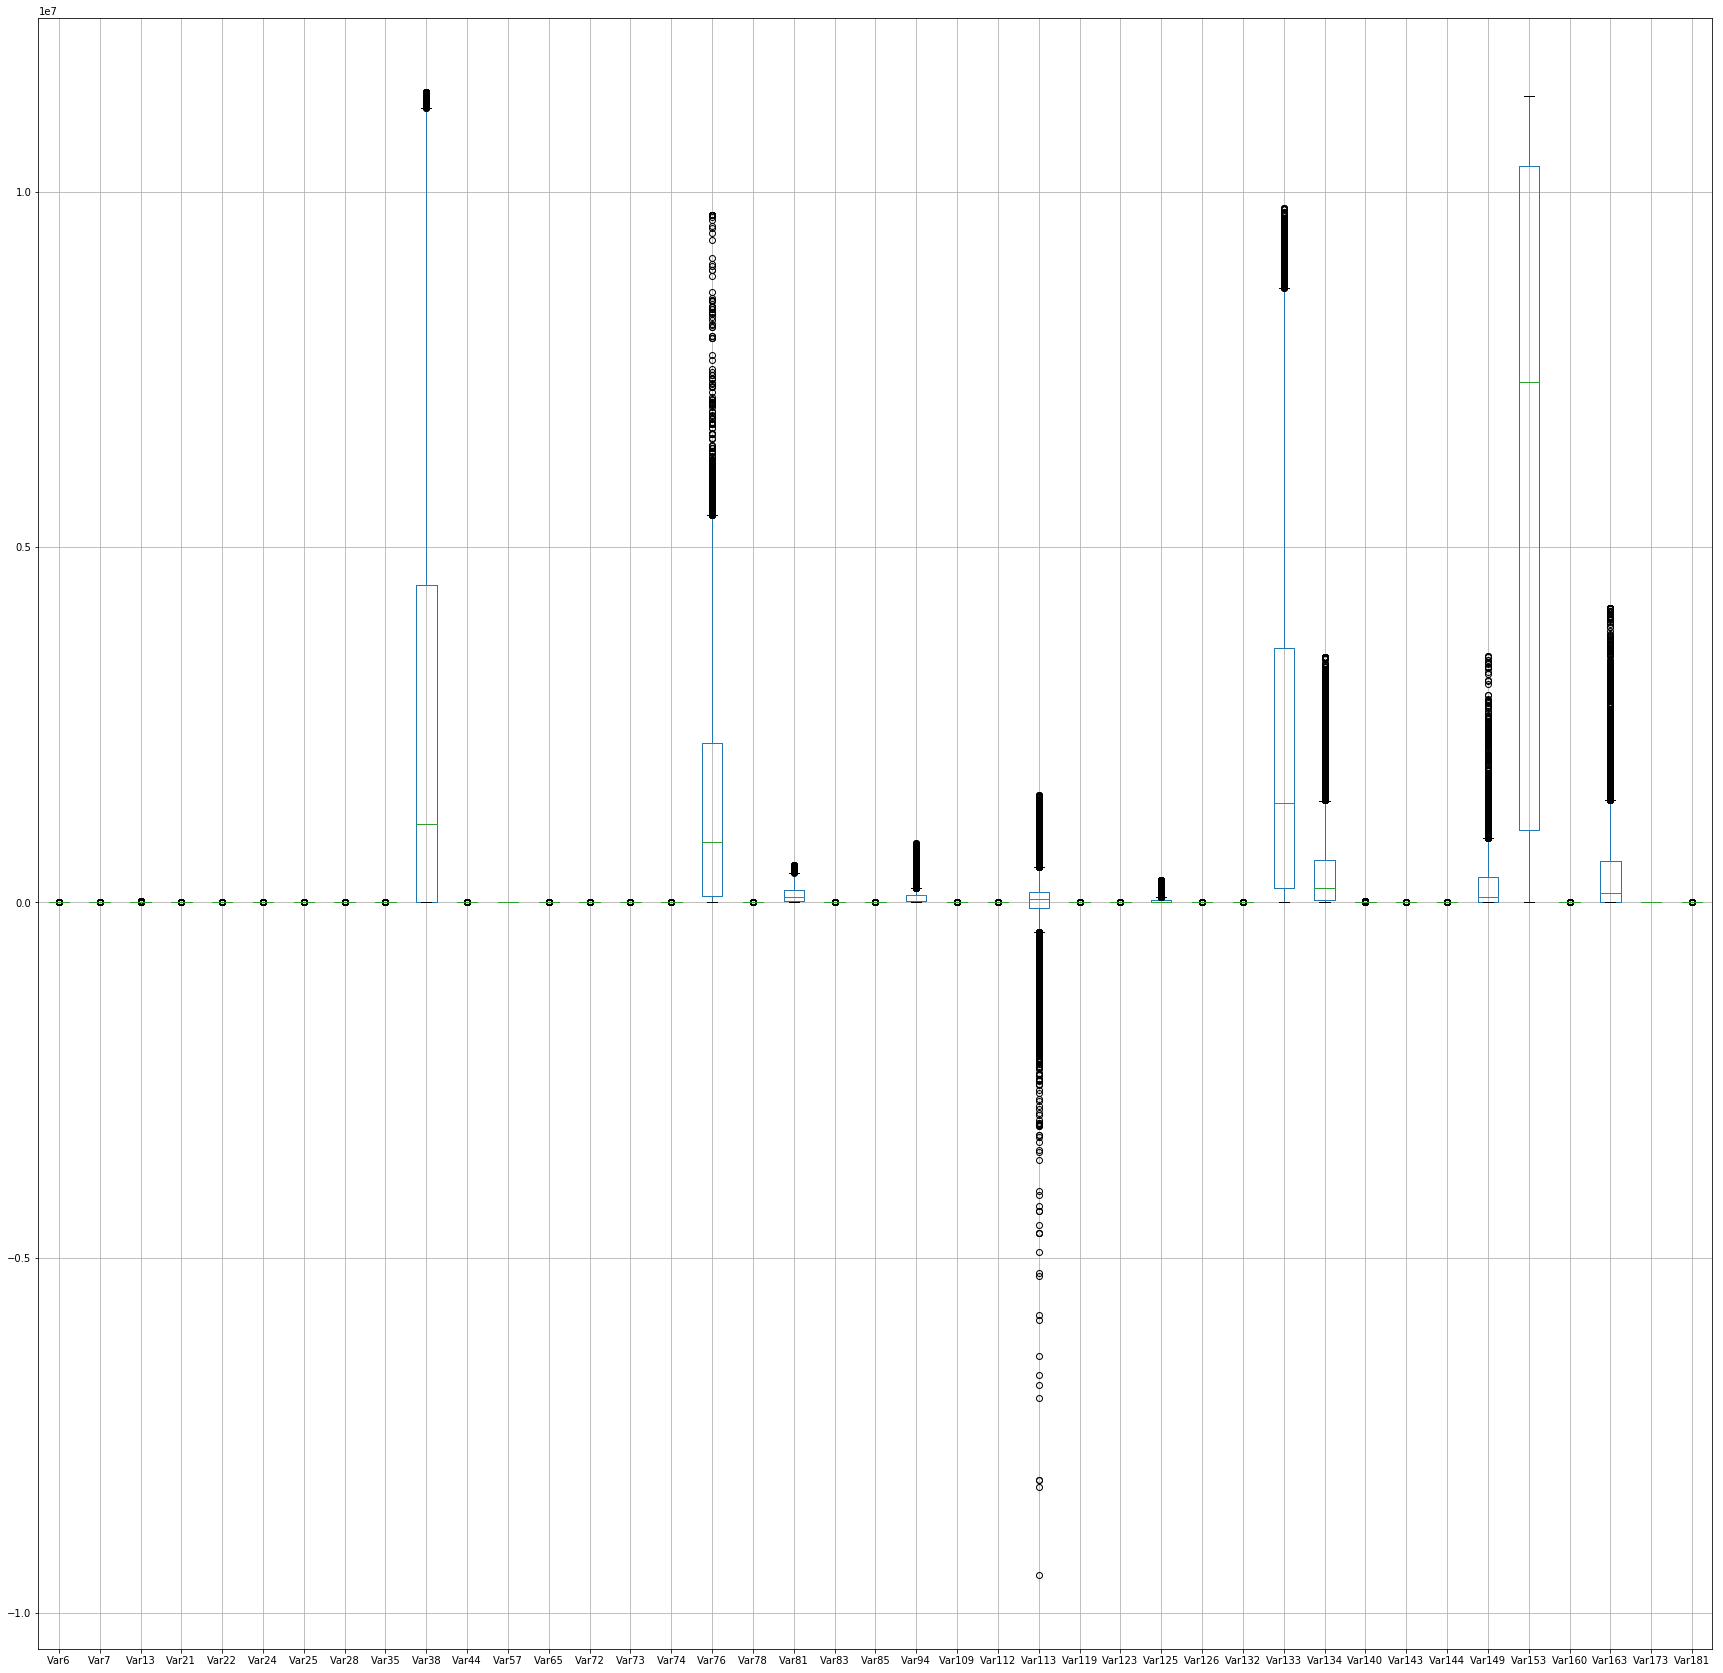

In [44]:
plt.figure(figsize=(30,30))
dataDepurado.boxplot()

In [45]:
dataStd = pd.DataFrame(preprocessing.scale(dataDepurado[var_indep_num]))
dataStd.columns=var_indep_num

In [46]:
dataStd.mean(axis=0)

Var6      1.670275e-16
Var7     -4.309858e-17
Var13    -3.238884e-17
Var21    -2.573616e-16
Var22    -1.598839e-17
Var24     2.605301e-16
Var25     1.198998e-16
Var28     6.385872e-16
Var35    -7.900206e-16
Var38     4.206646e-16
Var44    -1.534261e-15
Var57     3.237096e-16
Var65     1.412555e-15
Var72     1.240420e-15
Var73    -8.721230e-18
Var74    -1.028104e-15
Var76     3.445084e-16
Var78     9.868447e-16
Var81     2.461493e-17
Var83     2.865734e-16
Var85    -1.529539e-16
Var94     4.777811e-17
Var109    6.520081e-17
Var112   -3.154809e-17
Var113    7.305423e-18
Var119    2.618103e-16
Var123   -4.394663e-17
Var125   -4.119856e-18
Var126   -2.159214e-16
Var132    6.938894e-17
Var133   -8.954802e-18
Var134    2.025575e-16
Var140   -4.356662e-16
Var143   -2.397625e-15
Var144    5.434616e-16
Var149   -2.238952e-16
Var153    1.411495e-16
Var160    5.248729e-17
Var163    2.746127e-16
Var173    0.000000e+00
Var181   -5.177507e-16
dtype: float64

In [47]:
dataStd.std(axis=0)

Var6      1.000016
Var7      1.000016
Var13     1.000016
Var21     1.000016
Var22     1.000016
Var24     1.000016
Var25     1.000016
Var28     1.000016
Var35     1.000016
Var38     1.000016
Var44     1.000016
Var57     1.000016
Var65     1.000016
Var72     1.000016
Var73     1.000016
Var74     1.000016
Var76     1.000016
Var78     1.000016
Var81     1.000016
Var83     1.000016
Var85     1.000016
Var94     1.000016
Var109    1.000016
Var112    1.000016
Var113    1.000016
Var119    1.000016
Var123    1.000016
Var125    1.000016
Var126    1.000016
Var132    1.000016
Var133    1.000016
Var134    1.000016
Var140    1.000016
Var143    1.000016
Var144    1.000016
Var149    1.000016
Var153    1.000016
Var160    1.000016
Var163    1.000016
Var173    0.000000
Var181    1.000016
dtype: float64

voy a revisar si alguna categorica tiene una cantidad de clases menor a 5

In [48]:
data.Var195.unique()

array(['taul', 'LfvqpCtLOY', 'ev6I', 'CiJDdr4TQ0rGERIS', 'ArtjQZmIvr94p',
       'CuXi4je', 'I9xt3GBDKUbd8', 'hiMqnEM7VgIk4JUu', 'b_3Q',
       'ArtjQZ8ftr3NB', 'I9xt3GMcxUnBZ', 'bsZtYxFjzA', 'I9xt3GDRhUK7p',
       'lSbpiq1', 'ZZBPiZh', 'ArtjQZQO1r9fC', 'TnJpfvsJgF', 'XMIgoIlPqx',
       'BNjsq81k1tWAYigY', 'I9xt3Gi01UK7p', 'CiJsoa4TQ0rGHlMp',
       'V10_0kx3ZF2we', 'F1JQrEL'], dtype=object)

aplico un arbol al modelo para ver mejores columnas

# Clasificación a partir un árbol de decisión

Los árboles de decisión permiten utilizar tanto las variables predictivas categóricas como las numéricas.
No todas las variables van a ser útiles. El árbol se va a encargar de encontrar la mejor variable a utilizar en el contexto del subconjunto de datos de cada rama.

Veamos cómo se crea un árbol de decisión en scikit-learn, y algunos de los parámetros más importantes:

In [49]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=80,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=10, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.1, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

**Nota editorial**: no puedo creer que scikit-learn soporte en sus árboles de decisión solamente variables independientes numéricas!!!!! Toca entonces utilizar un encoding (one hot).

In [50]:
#data_cat_one_hot = pd.get_dummies(dataDepurado[var_indep_cat], prefix=var_indep_cat)
#X = dataDepurado[var_indep_num].join(data_cat_one_hot)
#X = dataStd
# 126
X = data[var_indep_num]
y = data['Conversion']
X.shape

(36069, 41)

Quedaron 24 variables independientes.

Vamos a normalizar las dos variables numéricas para que tengan la misma importancia en el modelo de KNN, dado que este se basa en la distancia las diferencias de escalas son importantes.

In [51]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [52]:
# Crear un normalizador Min-Max
#min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
#X_train_scaled = min_max_scaler.fit_transform(X_train)
#X_test_scaled = min_max_scaler.transform(X_test)

In [53]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [54]:
ctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=80,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Una vez el árbol es aprendido, se puede consultar diferentes atributos.
El mas interesante, aparte del árbol en sí, es el que asocia un índice de importancia a los atributos independientes en la clasificación:

In [55]:
ctree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [56]:
X.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181'],
      dtype='object')

Encontramos entonces que las variables en orden de importancia son:

In [57]:
X.columns[np.argsort(-ctree.feature_importances_)]

Index(['Var6', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125',
       'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144',
       'Var149', 'Var153', 'Var160', 'Var163', 'Var94', 'Var173', 'Var85',
       'Var81', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var83', 'Var181'],
      dtype='object')

## Evaluación del modelo

Ya tenemos el modelo "aprendido" con el dataset de 20000 instancias.
Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción. 

In [58]:
y_pred = ctree.predict(X_test)

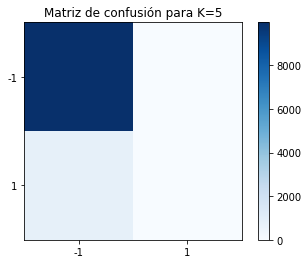

In [59]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()

In [60]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, "LEAVE", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, "LEAVE", average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, "LEAVE", average='macro'))


[[9978    0]
 [ 843    0]]
Exactitud:  0.9220959245910729
Kappa    :  0.0
Precisión     :  0.3073653081970243
Recall        :  0.3333333333333333
Especificidad :  nan
F1-score      :  0.31982306841675084


C:\Users\jeher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jeher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\jeher\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\jeher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jeher\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true 

Con el árbol completo, obtuvimos un nivel de accuracy del 61.68%, cuando el baseline era de 50.74%.

## Overfitting: poda del árbol

Vamos a ver que hubiera pasado si limitamos el crecimiento del árbol (prepoda), controlando la profundidad del árbol y el mínimo número de registros de un nodo para permitir el particionamiento.

**Parte 3**:

Modifiquen el parámetro **criterion** y los parámetros de pre-poda buscando una mejor exactitud del modelo:
- **max_depth**: entre mas grande el valor, el árbol será más complejo (más número de niveles de profundidad)
- **min_samples_split**: entre mas grande el valor, el árbol será más sencillo (se necesita tener más registros en un nodo para poder particionarlo)
- **min_samples_leaf**: entre mas grande el valor, el árbol será más sencillo (se necesita tener más registros en una hoja para poder aceptarla, si no se llega a esa cardinalidad, no se permite el partionamiento de su nodo padre) 
- **min_impurity_decrease**: entre mas grande el valor, el árbol será más sencillo (un nivel de impureza bajo inferior a este umbral no desatará un particionamiento. 


In [61]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos
    max_depth=10,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=100,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=10, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=1.1, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
ctree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=1.1, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
y_pred = ctree.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))

Exactitud:  0.9220959245910729


Podemos intentar con otro tipo de modelos, e.g KNN.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1234)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

NameError: name 'X_train_scaled' is not defined

También con un modelo Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(1234)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

**Dataset de prueba para los modelos**-


In [ ]:
for i in range(20025):
  dataset_prueba=data.iloc[i]
dataset_prueba




Tener encuenta:
* x= variable objetivo
* y= variables que pueden influir en la variable x

In [ ]:

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
#otra variable a tener presente var7,var38 var73, var76, var81, var132, var134, var153
#Falta mirar con variables object
sns.boxplot(x="Conversion", y=data.Var38, data=data)
plt.subplot(1,2,2)
sns.boxplot(x="Conversion", y=data.Var133, data=data)

**SUGIERO HACER MODELO DE NAIVE BAYES**

Aquí comienza el modelo que escojamos

**Creación de datasets: para el valor 1 y -1 de la variable categórica Conversion**

In [ ]:
#Dataset para la variable categorica Conersion con valor 1
data_one_positive=data[data.Conversion=="1"]
data_one_positive

In [ ]:
data_one_positive.count()

In [ ]:
#Dataset para la variable categorica Conersion con valor -1
data_one_negative=data[data.Conversion=="-1"]
data_one_negative

In [ ]:
data_one_negative.count()